In [ ]:
# Q21 Train a KNN Classifier on the Iris dataset and print model accuracy?
# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train KNN Classifier (k=5 by default)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 1.00


In [ ]:
#Q22 Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE)?
# Q22: Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE)

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# 1. Create synthetic regression dataset
X, y = make_regression(n_samples=200, n_features=3, noise=15, random_state=42)

# 2. Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and train KNN Regressor
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

# 4. Predict on test data
y_pred = knn_reg.predict(X_test)

# 5. Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# 6. Output results
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 1346.4068379126516


In [ ]:
#Q23 Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy?
# Train a KNN Classifier using Euclidean and Manhattan distances and compare accuracy

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Create synthetic classification dataset
X, y = make_classification(n_samples=300, n_features=4, n_informative=3, n_redundant=0, random_state=42)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. KNN with Euclidean distance (p=2)
knn_euclidean = KNeighborsClassifier(n_neighbors=5, p=2)
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
acc_euclidean = accuracy_score(y_test, y_pred_euclidean)

# 4. KNN with Manhattan distance (p=1)
knn_manhattan = KNeighborsClassifier(n_neighbors=5, p=1)
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
acc_manhattan = accuracy_score(y_test, y_pred_manhattan)

# 5. Print results
print("Accuracy with Euclidean distance:", acc_euclidean)
print("Accuracy with Manhattan distance:", acc_manhattan)


Accuracy with Euclidean distance: 0.8333333333333334
Accuracy with Manhattan distance: 0.85


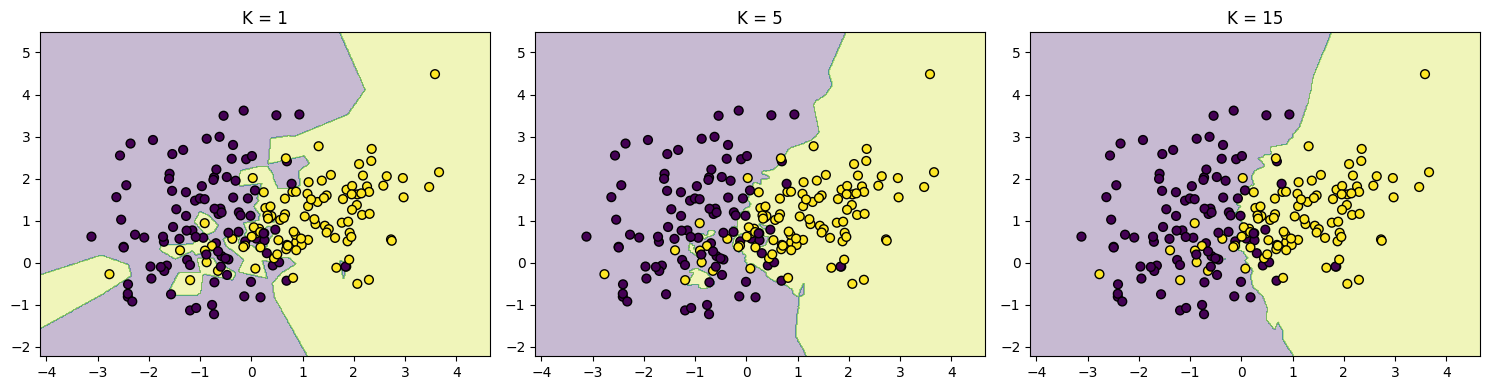

In [ ]:
#Q24 Train a KNN Classifier with different values of K and visualize decision boundaried?
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# 1. Generate a 2D dataset for easy visualization
X, y = make_classification(
    n_samples=200,
    n_features=2,       # Only 2 features for plotting
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Function to plot decision boundaries
def plot_decision_boundary(knn, X, y, ax, title):
    h = 0.02  # Mesh step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=40)
    ax.set_title(title)

# 4. Plot for different values of k
k_values = [1, 5, 15]
fig, axes = plt.subplots(1, len(k_values), figsize=(15, 4))

for ax, k in zip(axes, k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    plot_decision_boundary(knn, X, y, ax, f"K = {k}")

plt.tight_layout()
plt.show()


In [ ]:
#Q25 Apply Feature Scaling before training a KNN model and compare results with unscaled data?

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 1. Create synthetic dataset
X, y = make_classification(n_samples=300, n_features=5, n_informative=3, random_state=42)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. KNN without scaling
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)
acc_unscaled = accuracy_score(y_test, y_pred_unscaled)

# 4. Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. KNN with scaling
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

# 6. Compare results
print("Accuracy without scaling:", acc_unscaled)
print("Accuracy with scaling   :", acc_scaled)


Accuracy without scaling: 0.8666666666666667
Accuracy with scaling   : 0.85


In [ ]:
#Q26 Train a PCA model on synthetic data and print the explained variance ratio for each component?
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

# 1. Create synthetic dataset
X, y = make_classification(
    n_samples=200,
    n_features=5,
    n_informative=3,
    random_state=42
)

# 2. Apply PCA
pca = PCA()
pca.fit(X)

# 3. Print explained variance ratio
print("Explained Variance Ratio for each component:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.4f}")


Explained Variance Ratio for each component:
PC1: 0.5166
PC2: 0.3511
PC3: 0.1323
PC4: 0.0000
PC5: 0.0000


In [ ]:
#Q27 Apply PCA before training a KNN Classifier and compare accuracy with and without PCA5?
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 1. Create synthetic dataset
X, y = make_classification(
    n_samples=500,
    n_features=15,
    n_informative=10,
    n_redundant=5,
    random_state=42
)

# 2. Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Standardize features (important for PCA & KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. KNN without PCA
knn_no_pca = KNeighborsClassifier(n_neighbors=5)
knn_no_pca.fit(X_train_scaled, y_train)
y_pred_no_pca = knn_no_pca.predict(X_test_scaled)
acc_no_pca = accuracy_score(y_test, y_pred_no_pca)

# 5. Apply PCA (keep 5 components)
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 6. KNN with PCA
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

# 7. Compare results
print("Accuracy without PCA:", acc_no_pca)
print("Accuracy with PCA(5):", acc_pca)


Accuracy without PCA: 0.92
Accuracy with PCA(5): 0.84


In [ ]:
#Q28 Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV?
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 1. Create synthetic dataset
X, y = make_classification(
    n_samples=500,
    n_features=10,
    n_informative=7,
    n_redundant=3,
    random_state=42
)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Define hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
}

# 5. Create KNN model
knn = KNeighborsClassifier()

# 6. GridSearchCV
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

# 7. Best parameters & accuracy
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test_scaled)
test_acc = accuracy_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)
print("Test Set Accuracy:", test_acc)


Best Parameters: {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
Best CV Accuracy: 0.8925000000000001
Test Set Accuracy: 0.87


In [ ]:
#Q29 Train a KNN Classifier and check the number of misclassified samples?
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Create synthetic classification dataset
X, y = make_classification(
    n_samples=200,
    n_features=5,
    n_informative=3,
    random_state=42
)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 4. Predict
y_pred = knn.predict(X_test)

# 5. Calculate misclassified samples
misclassified_count = (y_test != y_pred).sum()

# 6. Print results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Number of misclassified samples:", misclassified_count)


Accuracy: 0.925
Number of misclassified samples: 3


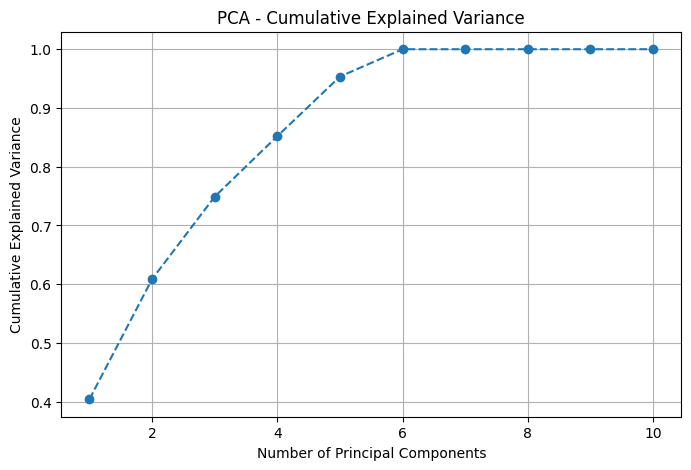

In [ ]:
#Q30 Train a PCA model and visualize the cumulative explained variance.?
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# 1. Create synthetic dataset
X, y = make_classification(
    n_samples=300,
    n_features=10,
    n_informative=6,
    n_redundant=4,
    random_state=42
)

# 2. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA
pca = PCA()
pca.fit(X_scaled)

# 4. Calculate cumulative explained variance
cum_var = np.cumsum(pca.explained_variance_ratio_)

# 5. Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cum_var) + 1), cum_var, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [ ]:
#Q31 Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare accuracy?
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 1. Create synthetic dataset
X, y = make_classification(
    n_samples=300,
    n_features=6,
    n_informative=4,
    n_redundant=2,
    random_state=42
)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. KNN with uniform weights
knn_uniform = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_uniform.fit(X_train_scaled, y_train)
y_pred_uniform = knn_uniform.predict(X_test_scaled)
acc_uniform = accuracy_score(y_test, y_pred_uniform)

# 5. KNN with distance weights
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_distance.fit(X_train_scaled, y_train)
y_pred_distance = knn_distance.predict(X_test_scaled)
acc_distance = accuracy_score(y_test, y_pred_distance)

# 6. Print results
print("Accuracy with uniform weights :", acc_uniform)
print("Accuracy with distance weights:", acc_distance)


Accuracy with uniform weights : 0.9
Accuracy with distance weights: 0.8833333333333333


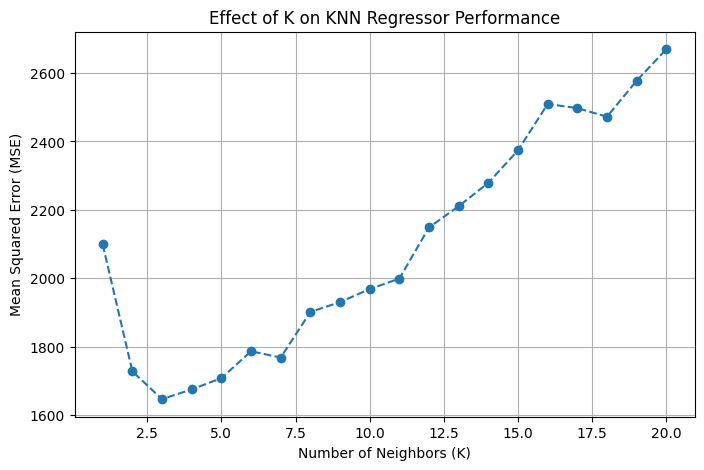

Best K value: 3 with MSE = 1646.66


In [ ]:
#Q32 Train a KNN Regressor and analyze the effect of different K values on performance?
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# 1. Create synthetic regression dataset
X, y = make_regression(
    n_samples=200,
    n_features=5,
    noise=15,
    random_state=42
)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Feature scaling (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Test different K values
k_values = range(1, 21)
mse_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# 5. Plot K vs MSE
plt.figure(figsize=(8, 5))
plt.plot(k_values, mse_scores, marker='o', linestyle='--')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Effect of K on KNN Regressor Performance")
plt.grid(True)
plt.show()

# 6. Best K
best_k = k_values[mse_scores.index(min(mse_scores))]
print(f"Best K value: {best_k} with MSE = {min(mse_scores):.2f}")


In [ ]:
#Q33 Implement KNN Imputation for handling missing values in a dataset?
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.datasets import load_iris

# 1. Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# 2. Introduce some missing values for demonstration
np.random.seed(42)
missing_mask = np.random.rand(*df.shape) < 0.1  # 10% missing
df[missing_mask] = np.nan

print("Before Imputation (with missing values):")
print(df.head())

# 3. Apply KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df)

# 4. Convert back to DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

print("\nAfter KNN Imputation (missing values filled):")
print(df_imputed.head())


Before Imputation (with missing values):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                NaN               0.2
2                4.7               3.2                NaN               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

After KNN Imputation (missing values filled):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.5               0.2
2                4.7               3.2                1.5               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


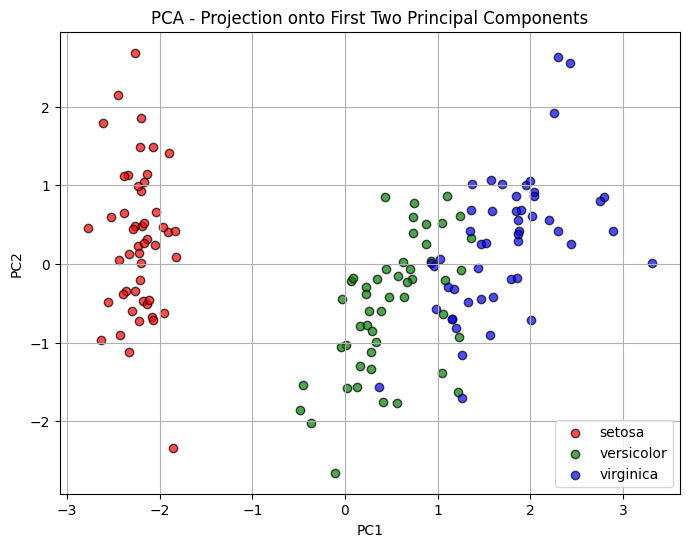

In [ ]:
#Q34 Train a PCA model and visualize the data projection onto the first two principal components?
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Load dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# 2. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA (keep 2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Plot projection
plt.figure(figsize=(8, 6))
for target, name, color in zip([0, 1, 2], target_names, ['red', 'green', 'blue']):
    plt.scatter(
        X_pca[y == target, 0],
        X_pca[y == target, 1],
        label=name,
        alpha=0.7,
        edgecolor='k',
        color=color
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - Projection onto First Two Principal Components")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Q35 Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance?
import time
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 1. Create synthetic dataset
X, y = make_classification(
    n_samples=5000,    # Larger dataset to see performance difference
    n_features=20,
    n_informative=15,
    n_redundant=5,
    random_state=42
)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def train_and_evaluate(algorithm_name):
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algorithm_name)
    start_time = time.time()
    knn.fit(X_train_scaled, y_train)
    fit_time = time.time() - start_time

    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)

    return acc, fit_time

# 4. Evaluate KD Tree
acc_kd, time_kd = train_and_evaluate("kd_tree")

# 5. Evaluate Ball Tree
acc_ball, time_ball = train_and_evaluate("ball_tree")

# 6. Print comparison
print("KD Tree  -> Accuracy:", acc_kd, " | Fit time:", round(time_kd, 4), "seconds")
print("Ball Tree -> Accuracy:", acc_ball, " | Fit time:", round(time_ball, 4), "seconds")


KD Tree  -> Accuracy: 0.973  | Fit time: 0.0144 seconds
Ball Tree -> Accuracy: 0.973  | Fit time: 0.0303 seconds


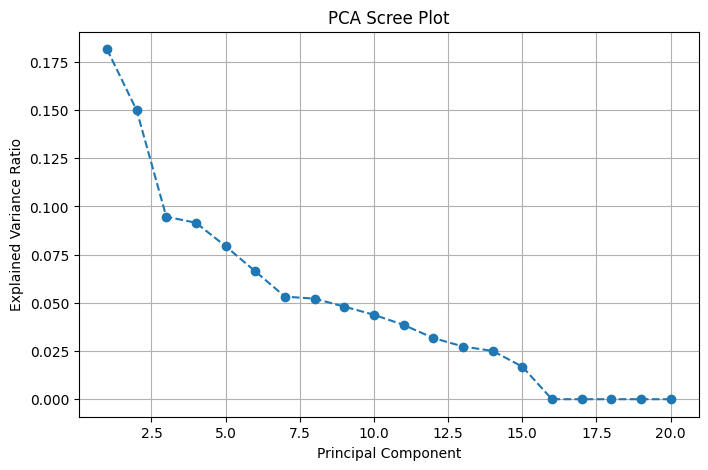

In [ ]:
#Q36 Train a PCA model on a high-dimensional dataset and visualize the Scree plot?
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Create a high-dimensional dataset
X, y = make_classification(
    n_samples=300,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    random_state=42
)

# 2. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA
pca = PCA()
pca.fit(X_scaled)

# 4. Explained variance ratios
explained_variance = pca.explained_variance_ratio_

# 5. Plot Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Scree Plot')
plt.grid(True)
plt.show()


In [ ]:
#Q37 Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score?
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# 1. Create synthetic dataset
X, y = make_classification(
    n_samples=300,
    n_features=6,
    n_informative=4,
    n_redundant=2,
    n_classes=2,
    random_state=42
)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 5. Predict
y_pred = knn.predict(X_test_scaled)

# 6. Evaluate using Precision, Recall, and F1-Score
report = classification_report(y_test, y_pred)
print("Classification Report:\n")
print(report)


Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.84      0.90        32
           1       0.84      0.96      0.90        28

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.91      0.90      0.90        60



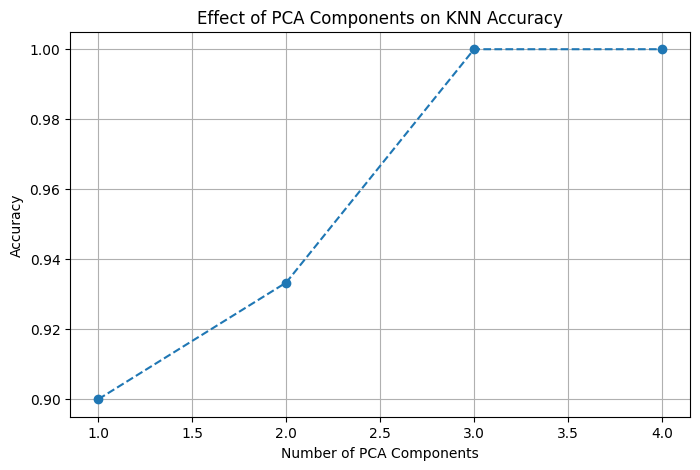

In [ ]:
#Q38 Train a PCA model and analyze the effect of different numbers of components on accuracy?
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Test different numbers of PCA components
components_range = range(1, X.shape[1]+1)
accuracy_scores = []

for n_components in components_range:
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Train KNN
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_pca, y_train)

    # Predict and evaluate
    y_pred = knn.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

# 5. Plot accuracy vs number of PCA components
plt.figure(figsize=(8,5))
plt.plot(components_range, accuracy_scores, marker='o', linestyle='--')
plt.xlabel("Number of PCA Components")
plt.ylabel("Accuracy")
plt.title("Effect of PCA Components on KNN Accuracy")
plt.grid(True)
plt.show()


Leaf size: 10 -> Accuracy: 0.8700
Leaf size: 20 -> Accuracy: 0.8700
Leaf size: 30 -> Accuracy: 0.8700
Leaf size: 40 -> Accuracy: 0.8700
Leaf size: 50 -> Accuracy: 0.8700


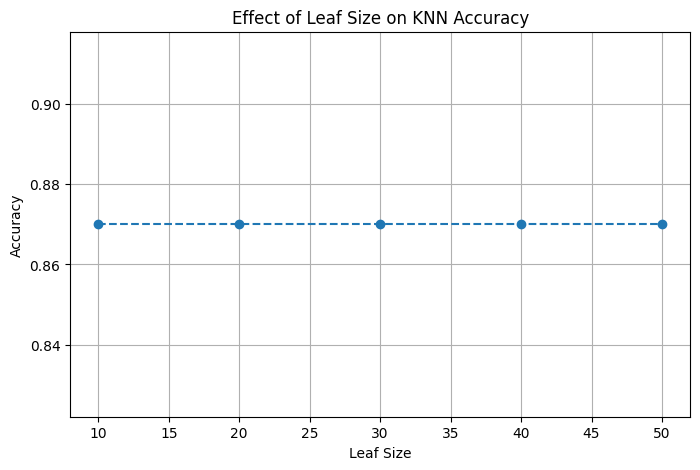

In [ ]:
#Q39 Train a KNN Classifier with different leaf_size values and compare accuracy?
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 1. Create synthetic dataset
X, y = make_classification(
    n_samples=500,
    n_features=10,
    n_informative=7,
    n_redundant=3,
    random_state=42
)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Test different leaf_size values
leaf_sizes = [10, 20, 30, 40, 50]
accuracy_scores = []

for leaf in leaf_sizes:
    knn = KNeighborsClassifier(n_neighbors=5, leaf_size=leaf, algorithm='kd_tree')
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

# 5. Print results
for leaf, acc in zip(leaf_sizes, accuracy_scores):
    print(f"Leaf size: {leaf} -> Accuracy: {acc:.4f}")

# 6. Optional: plot leaf_size vs accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(leaf_sizes, accuracy_scores, marker='o', linestyle='--')
plt.xlabel("Leaf Size")
plt.ylabel("Accuracy")
plt.title("Effect of Leaf Size on KNN Accuracy")
plt.grid(True)
plt.show()


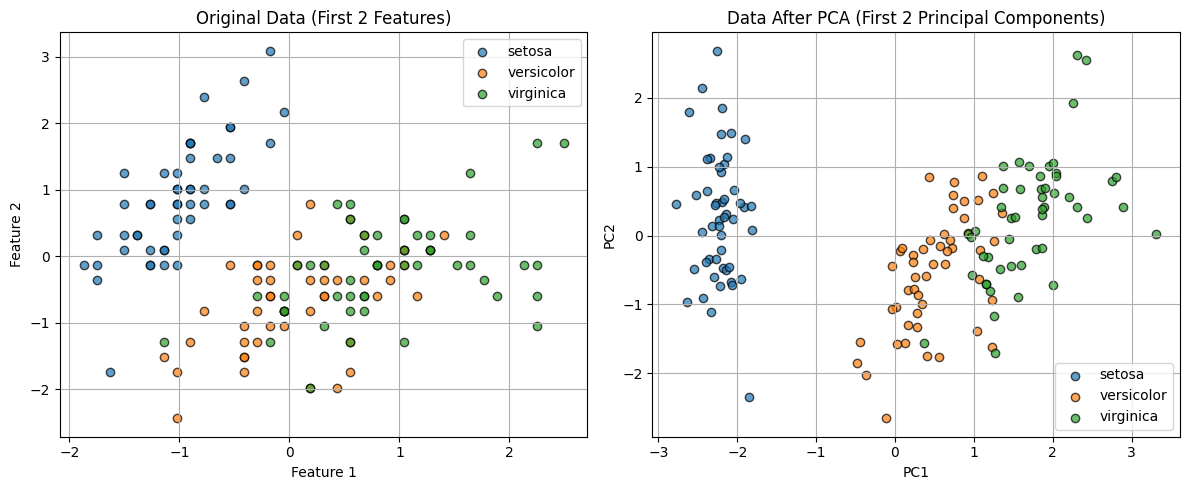

In [ ]:
#Q40 Train a PCA model and visualize how data points are transformed before and after PCA?
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Load dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# 2. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. PCA transformation (keep 2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Plot original data (first two features)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
for target, color, name in zip([0,1,2], ['red','green','blue'], target_names):
    plt.scatter(X_scaled[y==target,0], X_scaled[y==target,1], label=name, alpha=0.7, edgecolor='k')
plt.title("Original Data (First 2 Features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)

# 5. Plot PCA-transformed data
plt.subplot(1,2,2)
for target, color, name in zip([0,1,2], ['red','green','blue'], target_names):
    plt.scatter(X_pca[y==target,0], X_pca[y==target,1], label=name, alpha=0.7, edgecolor='k')
plt.title("Data After PCA (First 2 Principal Components)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
#Q41 Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report?
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# 1. Load Wine dataset
wine = load_wine()
X, y = wine.data, wine.target
target_names = wine.target_names

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 5. Predict
y_pred = knn.predict(X_test_scaled)

# 6. Print classification report
report = classification_report(y_test, y_pred, target_names=target_names)
print("Classification Report:\n")
print(report)



Classification Report:

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       1.00      0.93      0.96        14
     class_2       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



In [ ]:
#Q42 Train a KNN Regressor and analyze the effect of different distance metrics on prediction error?
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# 1. Create synthetic regression dataset
X, y = make_regression(
    n_samples=300,
    n_features=5,
    noise=15,
    random_state=42
)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train KNN Regressor with Euclidean distance (p=2)
knn_euclidean = KNeighborsRegressor(n_neighbors=5, p=2)
knn_euclidean.fit(X_train_scaled, y_train)
y_pred_euc = knn_euclidean.predict(X_test_scaled)
mse_euc = mean_squared_error(y_test, y_pred_euc)

# 5. Train KNN Regressor with Manhattan distance (p=1)
knn_manhattan = KNeighborsRegressor(n_neighbors=5, p=1)
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_man = knn_manhattan.predict(X_test_scaled)
mse_man = mean_squared_error(y_test, y_pred_man)

# 6. Compare results
print("Mean Squared Error with Euclidean distance (p=2):", round(mse_euc, 2))
print("Mean Squared Error with Manhattan distance (p=1):", round(mse_man, 2))


Mean Squared Error with Euclidean distance (p=2): 1344.38
Mean Squared Error with Manhattan distance (p=1): 1354.31


ROC-AUC Score: 0.9285


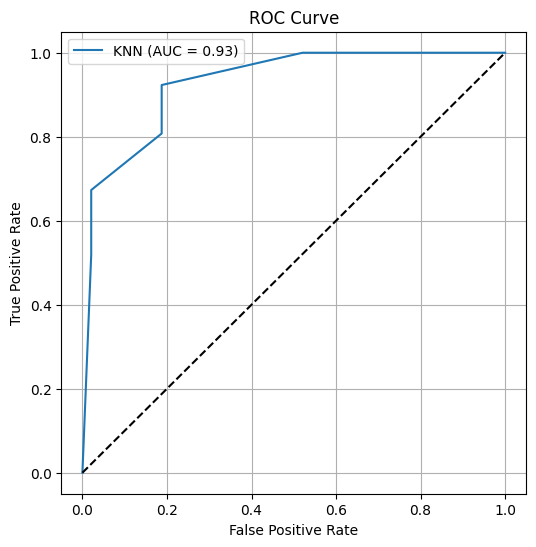

In [ ]:
#Q43 Train a KNN Classifier and evaluate using ROC-AUC score?
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 1. Create synthetic binary classification dataset
X, y = make_classification(
    n_samples=500,
    n_features=6,
    n_informative=4,
    n_redundant=2,
    n_classes=2,
    random_state=42
)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 5. Predict probabilities for positive class
y_proba = knn.predict_proba(X_test_scaled)[:, 1]

# 6. Compute ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", round(roc_auc, 4))

# 7. Optional: Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


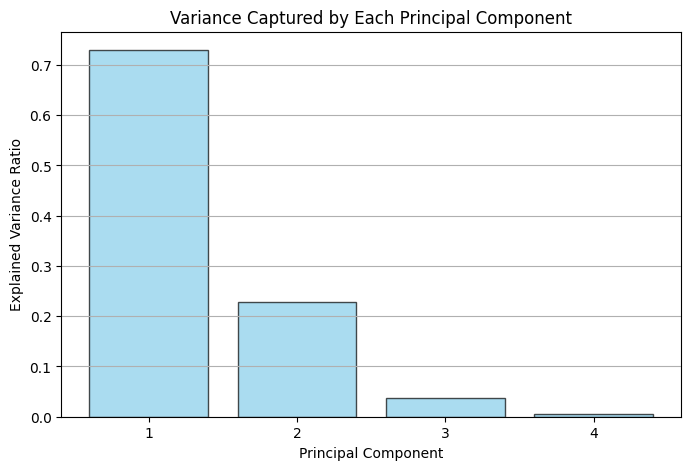

In [ ]:
#Q44 Train a PCA model and visualize the variance captured by each principal component?
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# 2. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA
pca = PCA()
pca.fit(X_scaled)

# 4. Explained variance for each component
explained_variance = pca.explained_variance_ratio_

# 5. Plot variance captured by each component
plt.figure(figsize=(8,5))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.7, color='skyblue', edgecolor='k')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Captured by Each Principal Component')
plt.xticks(range(1, len(explained_variance)+1))
plt.grid(axis='y')
plt.show()


In [ ]:
#Q45 Train a KNN Classifier and perform feature selection before training?
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# 1. Load dataset
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Feature selection - select top 2 features
selector = SelectKBest(score_func=f_classif, k=2)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Get selected feature indices
selected_features = selector.get_support(indices=True)
print("Selected feature indices:", selected_features)
print("Selected feature names:", [feature_names[i] for i in selected_features])

# 5. Train KNN Classifier on selected features
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_selected, y_train)

# 6. Predict and evaluate
y_pred = knn.predict(X_test_selected)
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n")
print(report)


Selected feature indices: [2 3]
Selected feature names: ['petal length (cm)', 'petal width (cm)']

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



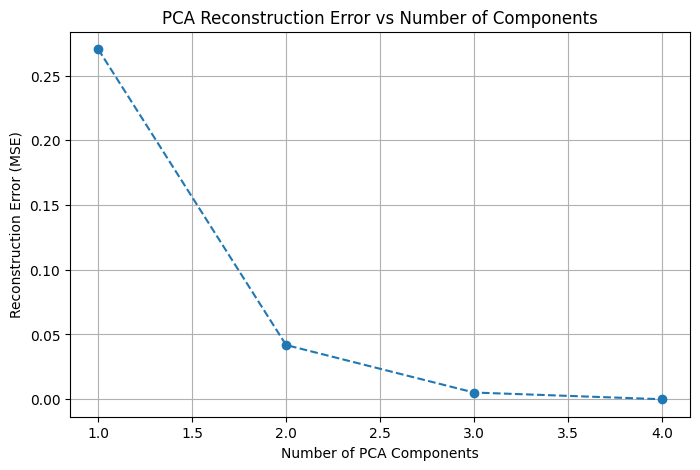

In [ ]:
#Q46 Train a PCA model and visualize the data reconstruction error after reducing dimensions?
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# 2. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Test different numbers of PCA components
n_features = X_scaled.shape[1]
reconstruction_errors = []

for n_components in range(1, n_features + 1):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    X_reconstructed = pca.inverse_transform(X_pca)

    # Compute reconstruction error (MSE)
    mse = np.mean((X_scaled - X_reconstructed) ** 2)
    reconstruction_errors.append(mse)

# 4. Plot reconstruction error vs number of components
plt.figure(figsize=(8,5))
plt.plot(range(1, n_features + 1), reconstruction_errors, marker='o', linestyle='--')
plt.xlabel("Number of PCA Components")
plt.ylabel("Reconstruction Error (MSE)")
plt.title("PCA Reconstruction Error vs Number of Components")
plt.grid(True)
plt.show()



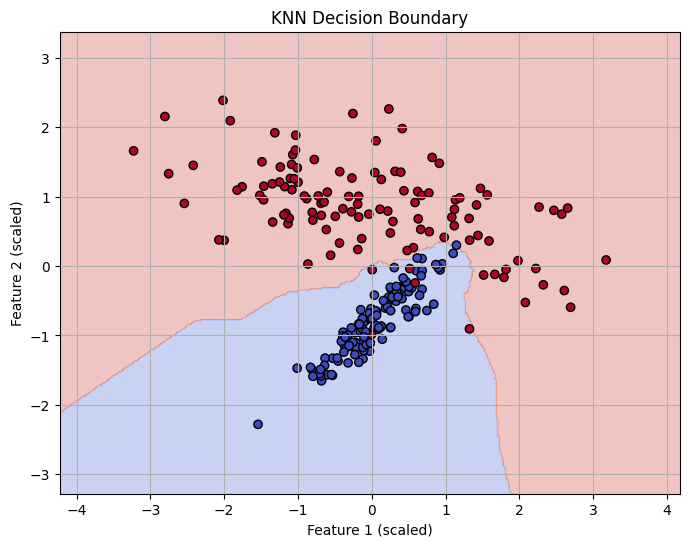

In [ ]:
#Q47 Train a KNN Classifier and visualize the decision boundary?
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# 1. Create synthetic 2D dataset
X, y = make_classification(
    n_samples=300,
    n_features=2,  # 2 features for easy plotting
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 5. Create meshgrid for decision boundary
h = 0.02  # step size
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# 6. Predict over meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 7. Plot decision boundary and training points
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.coolwarm)
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.title("KNN Decision Boundary")
plt.grid(True)
plt.show()


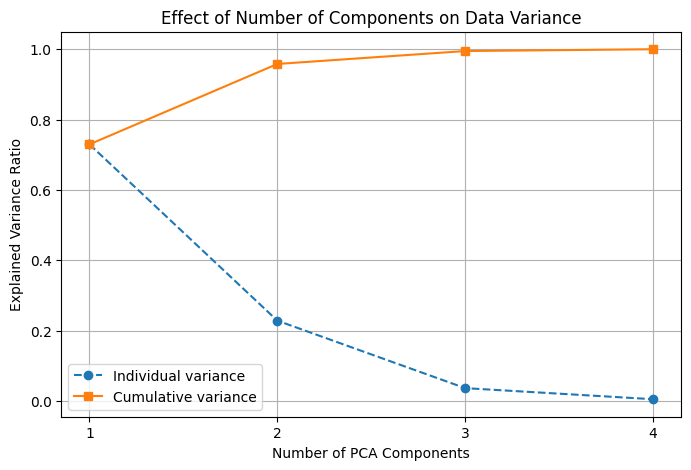

In [ ]:
#Q48 Train a PCA model and analyze the effect of different numbers of components on data variance?
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# 1. Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# 2. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA with all components
pca = PCA()
pca.fit(X_scaled)

# 4. Explained variance ratios
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# 5. Plot variance explained vs number of components
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--', label='Individual variance')
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='s', linestyle='-', label='Cumulative variance')
plt.xlabel('Number of PCA Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Effect of Number of Components on Data Variance')
plt.xticks(range(1, len(explained_variance)+1))
plt.grid(True)
plt.legend()
plt.show()
